<h1>Linear Regression</h1>
<h1>______________________________________</h1>

<p>Its the approximation of a linear model used to describe the relationship between two or more variables.</p>
<p>The equation of a simple linear model is:</p>
<h4><b>Y</b> = a<b>X</b> + b</h4>
<p>Where Y is the dependent variable and X is the dependent variable. a and b are the parameters we adjust. a:'gradient' b:'intercept'.

In [1]:
# importing the required packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

<p>Define the independent variables</p>

In [4]:
X = np.arange(0.0,5.0,0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

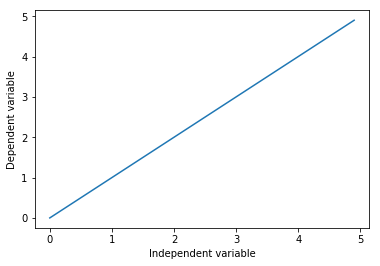

In [6]:
# lets check the graph
a = 1
b = 0

Y = a*X + b
plt.plot(X,Y)
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')
plt.show()

<h2>Linear Regression with Tensorflow</h2>

<p>We will use a FuelConsumption <a href='http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64'>dataset</a> and apply linear regression on it</p><p>You may need to clean up the csv file, just make sure theres only one heading row and the details of the data in the bottom of the csv is removed</p>

In [25]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS,CO2,SMOG
0,2018,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,6,3
1,2018,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,3
2,2018,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,4,3
3,2018,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2018,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [26]:
train_x = np.asanyarray(df[['ENGINE SIZE']])
train_y = np.asanyarray(df[['CO2 EMISSIONS']])

In [27]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a*train_x + b

<p>Loss function</p>
<p>To fin the value of our loss, we will use <b>tf.reduce_mean()</b>. This function find the mean of a multidimensional tensor, and the result can have a different dimension</p>

In [28]:
loss = tf.reduce_mean(tf.square(y - train_y))

<p>Now the optimizer. The gradient descent optimizer takes learning rate, which results the speed at which the optimizer should learn.</p>


In [29]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

<p>We will use <b>.minimize()</b> which will minimize the error function of our optimizer.<p>

In [30]:
train = optimizer.minimize(loss)

<p>Initiate the variables</p>

In [32]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

<p>Start the optimization and run the graph</p>

In [33]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a,b])
    loss_values.append(loss_val)
    if step % 5 ==0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26163.441 71.81505 45.959316
5 2148.38 60.19867 49.921295
10 1979.684 58.50034 56.115345
15 1833.6602 56.91428 61.876686
20 1707.2544 55.438602 67.23706
25 1597.8312 54.06563 72.22437
30 1503.109 52.788216 76.864586
35 1421.1119 51.5997 81.18187
40 1350.1315 50.4939 85.19868
45 1288.6868 49.465057 88.93594
50 1235.4974 48.50782 92.41311
55 1189.4539 47.6172 95.64828
60 1149.5958 46.788563 98.65829
65 1115.093 46.0176 101.45881
70 1085.2253 45.300293 104.06443
75 1059.3706 44.632904 106.488716
80 1036.9894 44.011967 108.74427
85 1017.61505 43.43424 110.84286
90 1000.8435 42.89672 112.79539
95 986.32513 42.396614 114.61202


<p>Plot the loss values</p>

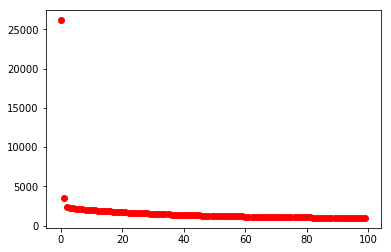

In [34]:
plt.plot(loss_values,'ro')

<p>Visualization of how the coefficient and intercept line has changed to fit the data.</p>

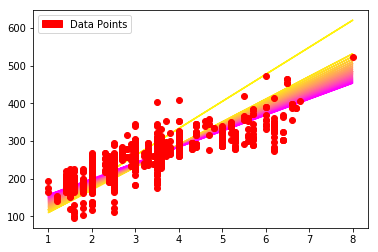

In [40]:
cr, cg, cb = (1.0,1.0,0.0)
for f in train_data:
    cb += 1.0/ len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg <0.0: cg = 0.0
    [a,b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color = (cr, cg,cb))
plt.plot(train_x, train_y, 'ro')

green_line = mpatches.Patch(color = 'red', label = 'Data Points')
plt.legend(handles = [green_line])
plt.show()

<h1>____________________________________________________</h1>